In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
round01 = pd.read_csv('FinalServerIPCountGrouped_round_1.csv')
round02 = pd.read_csv('FinalServerIPCountGrouped_round_2.csv')
round03 = pd.read_csv('FinalServerIPCountGrouped_round_3.csv')

In [4]:
round01

,Servers,IPCount
0,AkamaiGHost,2324635
1,nginx,1505911
2,Apache,1047328
3,cloudflare,500594
4,awselb/2.0,442421
...,...,...
58457,Apache/2.4.43 (Win32) OpenSSL/1.1.1g mod_wsgi/...,1
58458,Apache/2.4.43 (Win32) OpenSSL/1.1.1g mod_wsgi/...,1
58459,🙈 🙉 🙊,1
58460,C07Y30XVJYVYaOJ3g8TG,0


In [8]:
total = pd.concat([round01, round02,round03]).groupby(['Servers']).sum().reset_index()

In [10]:
total = total.sort_values(by=[ 'IPCount'],ascending=False)

In [ ]:
total

In [167]:
def plotGraph(serverList,plotTitle):
    rounds = []
    for server in serverList:
      temp = []
      temp.append(round01[round01["Servers"] == server]['IPCount'].values[0])
      temp.append(round02[round02["Servers"] == server]['IPCount'].values[0])
      temp.append(round03[round03["Servers"] == server]['IPCount'].values[0])
      rounds.append(temp)

    dataForTop20Plot = pd.DataFrame({'Round 01': [rounds[i][0] for i in range(serverList.size)],
                   'Round 02': [rounds[i][1] for i in range(serverList.size)],
                   'Round 03': [rounds[i][2] for i in range(serverList.size)] 
                   }, index=serverList.values)
    
    ax = dataForTop20Plot.plot.bar(figsize=(20,10),width=0.8,xlabel='Server Names',ylabel='IP Count',title=plotTitle)
    plt.savefig(plotTitle+'.png')

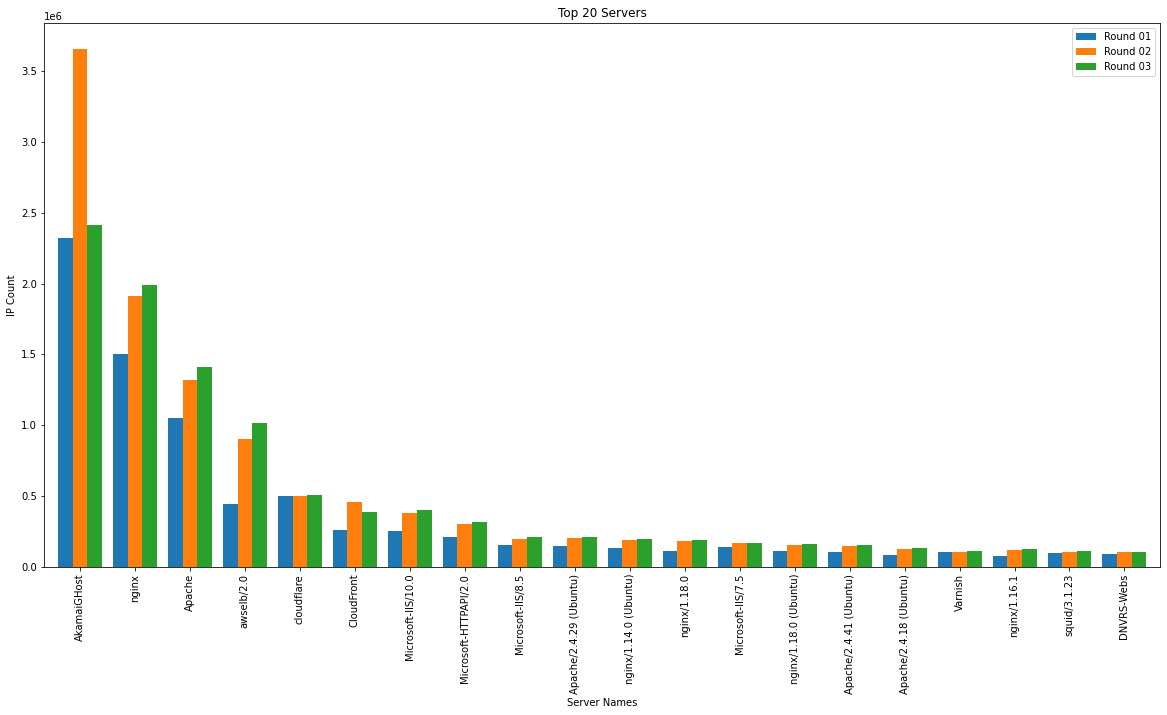

In [168]:
plotGraph(total.iloc[:20,0],'Top 20 Servers')

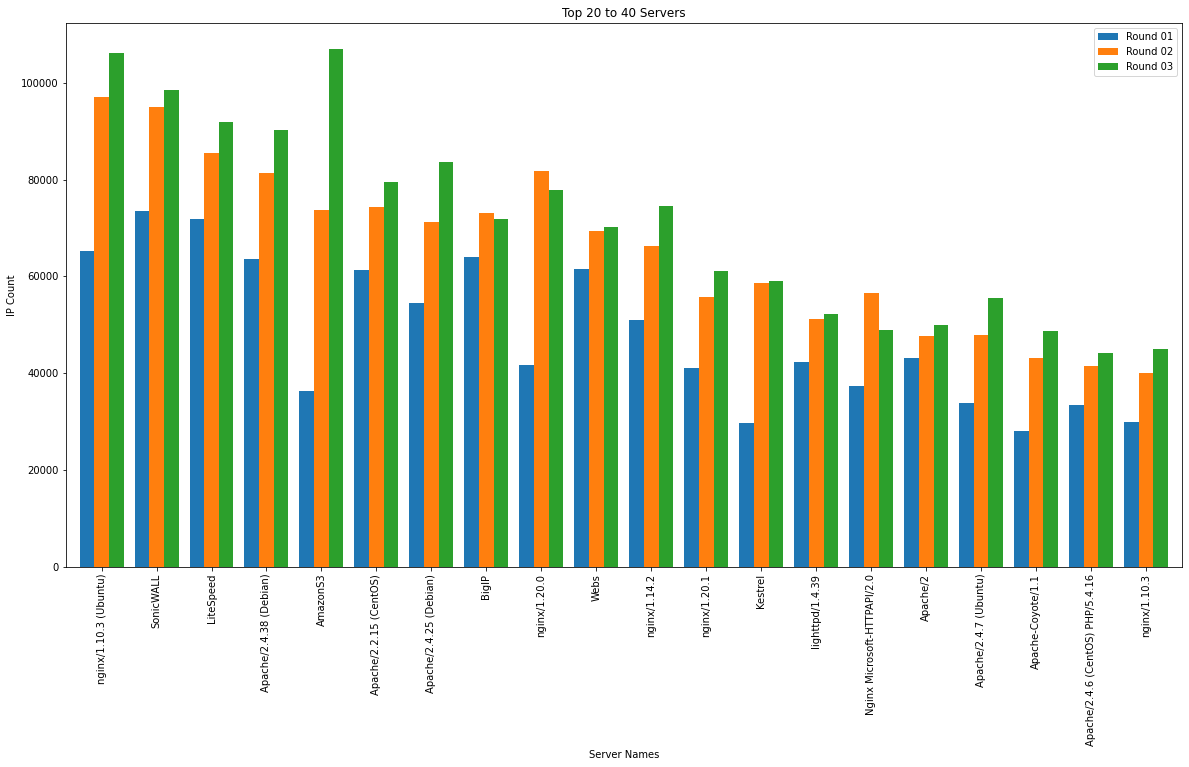

In [169]:
plotGraph(total.iloc[20:40,0],"Top 20 to 40 Servers")

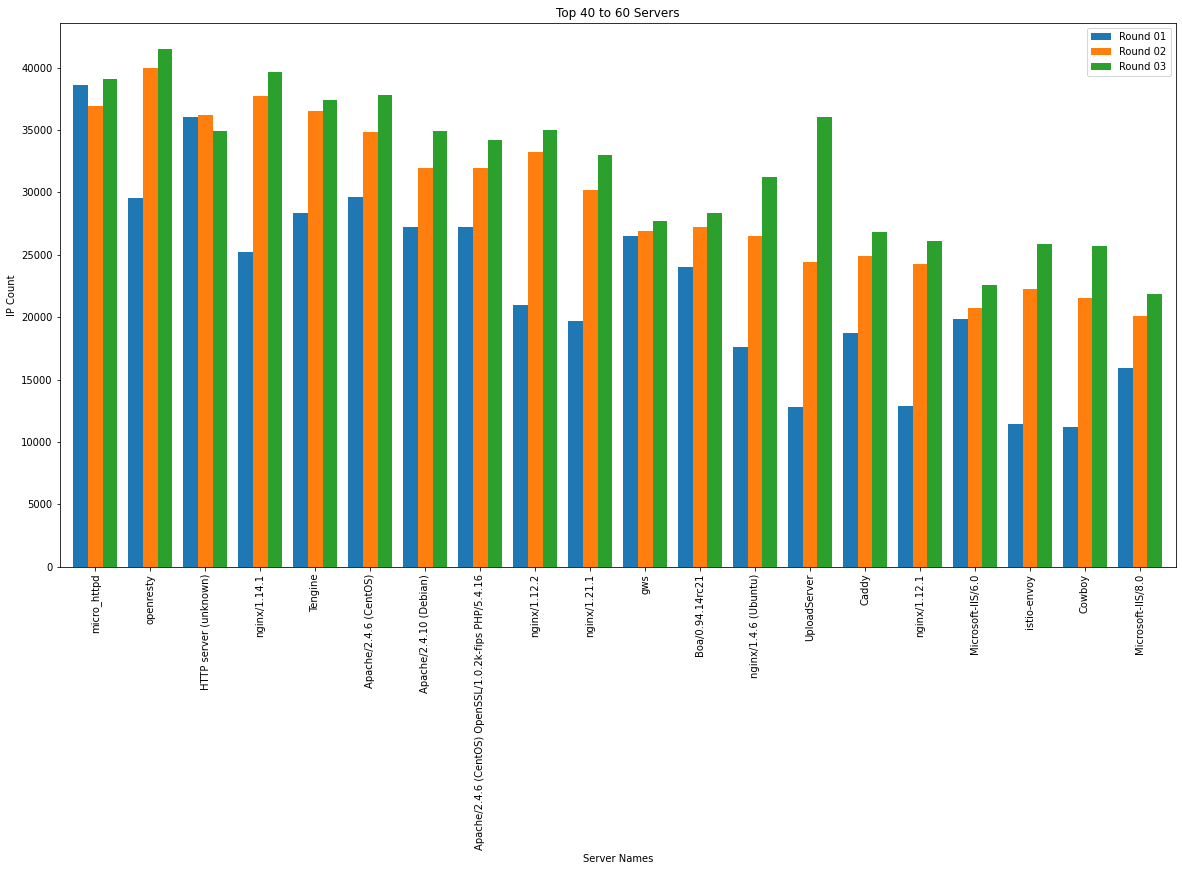

In [170]:
plotGraph(total.iloc[40:60,0],"Top 40 to 60 Servers")

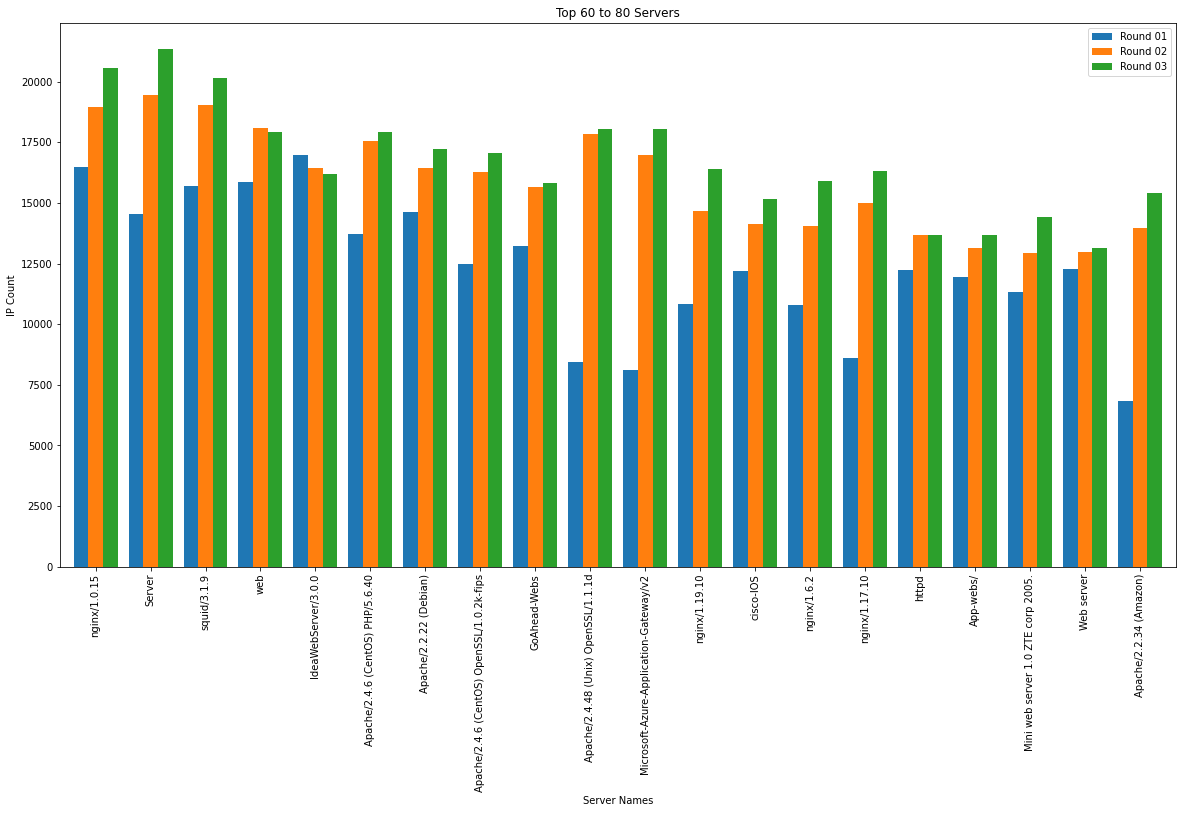

In [171]:
plotGraph(total.iloc[60:80,0],"Top 60 to 80 Servers")

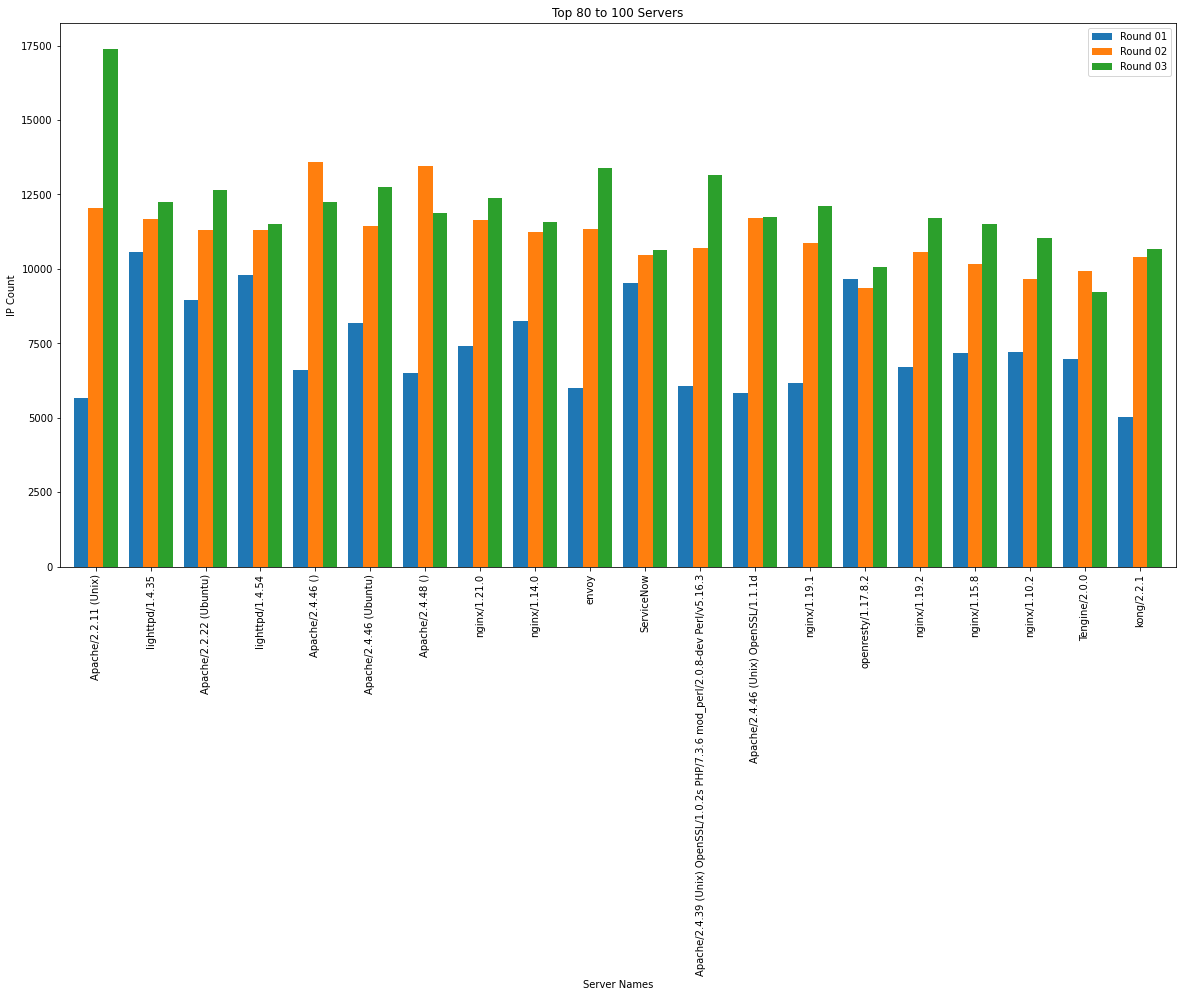

In [172]:
plotGraph(total.iloc[80:100,0],"Top 80 to 100 Servers")